In [1]:
#Install gdown library 
!pip install gdown


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
#Download file in Jupyter notebook
import gdown

file_id = "1TSWCW8WqoPnTVwjoCbz8xdSYpJe5ylvJ"
url = f"https://drive.google.com/uc?id={file_id}"

output = 'teleco_time_series .csv'  # Specify your desired output file name
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1TSWCW8WqoPnTVwjoCbz8xdSYpJe5ylvJ
To: /Users/jasminemoniquecooper/teleco_time_series .csv
100%|██████████████████████████████████████| 12.2k/12.2k [00:00<00:00, 7.95MB/s]


'teleco_time_series .csv'

In [6]:
import pandas as pd 
import numpy as np 
import missingno as msno

churn_time_data = pd.read_csv(output)

pd.set_option('display.max_columns', None)
churn_time_data.head(10)

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
5,6,0.107654
6,7,0.493901
7,8,0.376698
8,9,0.304075
9,10,0.591748


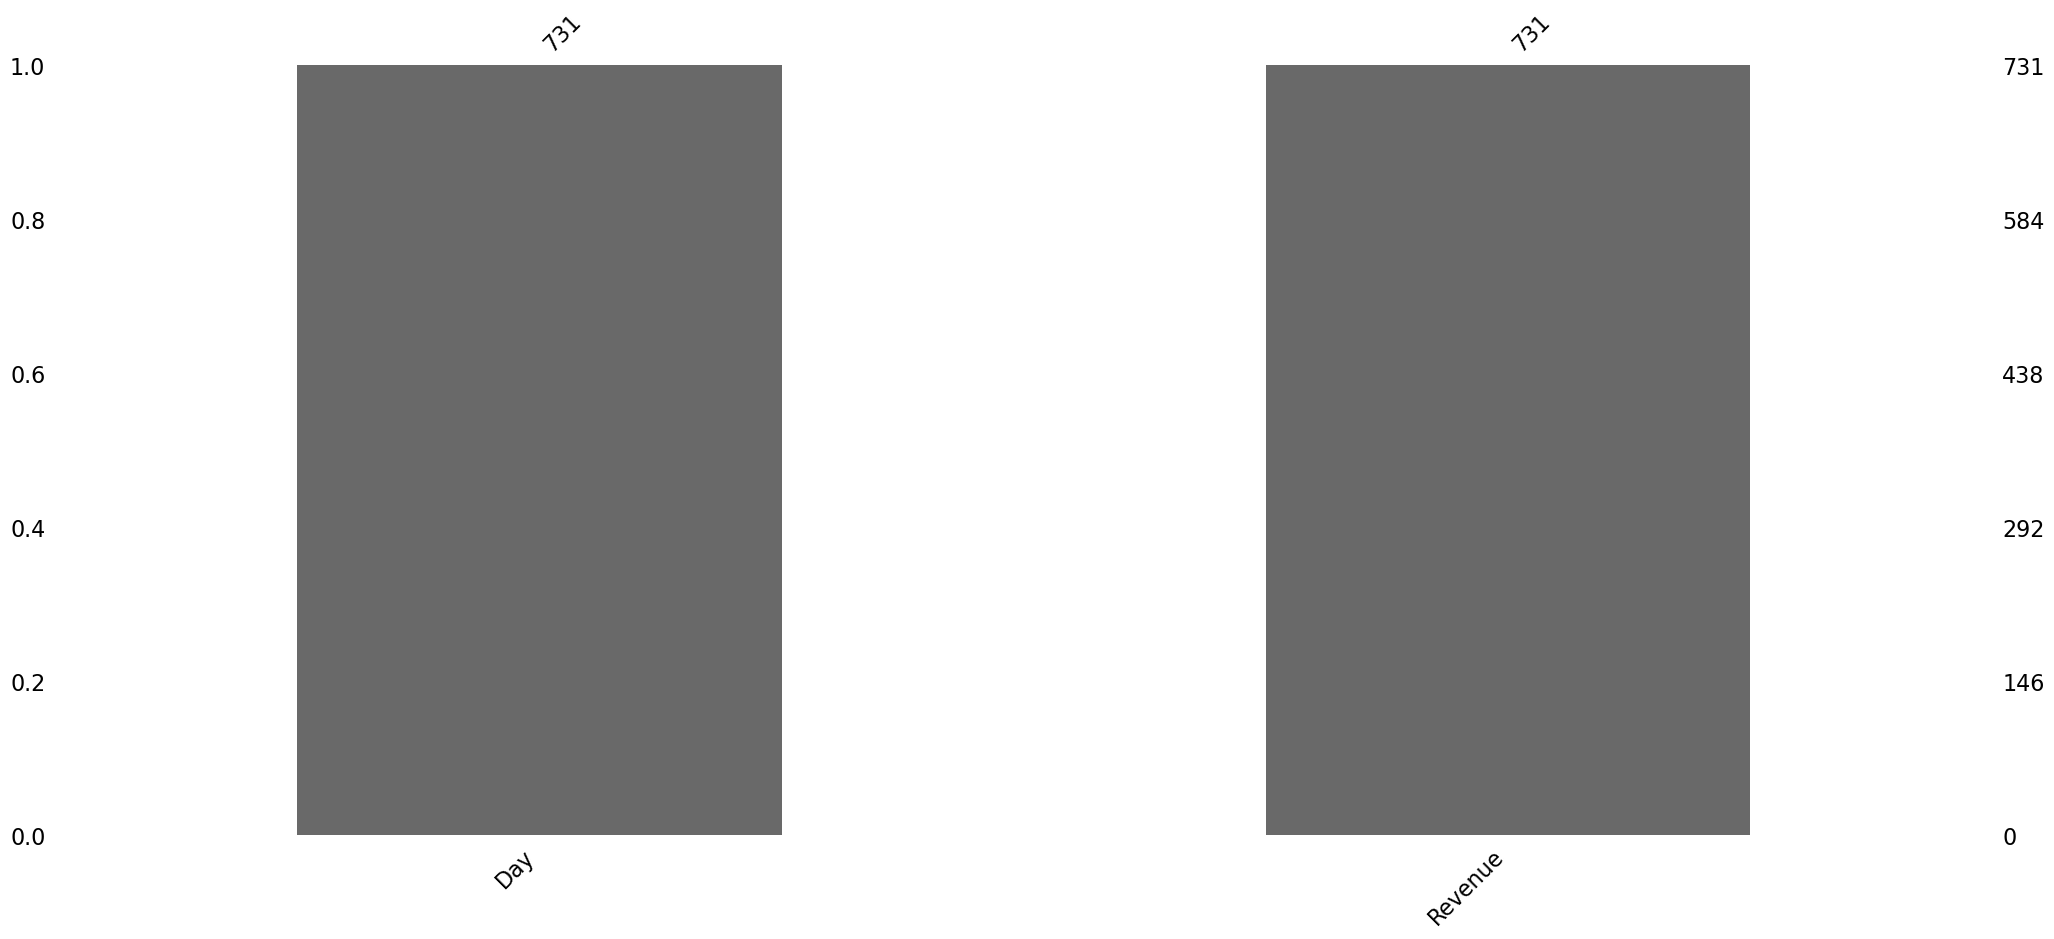

In [7]:
#ensure I pulled correct data and no missingness
import missingno as msno
import matplotlib.pyplot as plt
column_order = churn_time_data.isnull().sum().sort_values().index
msno.bar(churn_time_data[column_order])
plt.show()

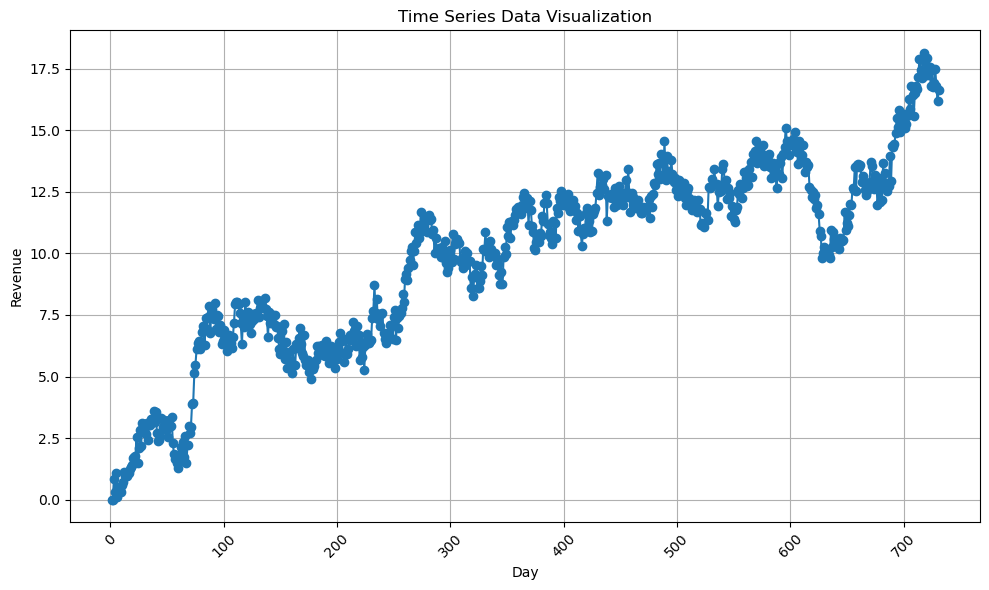

In [3]:
#line graph 
plt.figure(figsize=(10, 6))
plt.plot(churn_time_data['Day'], churn_time_data['Revenue'], marker='o', linestyle='-')
plt.title('Time Series Data Visualization')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ADF Statistic: -1.9246121573101858
p-value: 0.3205728150793956
Critical Value (1%): -3.4393520240470554
Critical Value (5%): -2.8655128165959236
Critical Value (10%): -2.5688855736949163
Significance Level: 0.05
Fail to Reject Null Hypothesis: Time series is non-stationary.

KPSS Statistic: 3.5607139300692445
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739
Significance Level: 0.05
Reject Null Hypothesis: Time series is non-stationary.


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


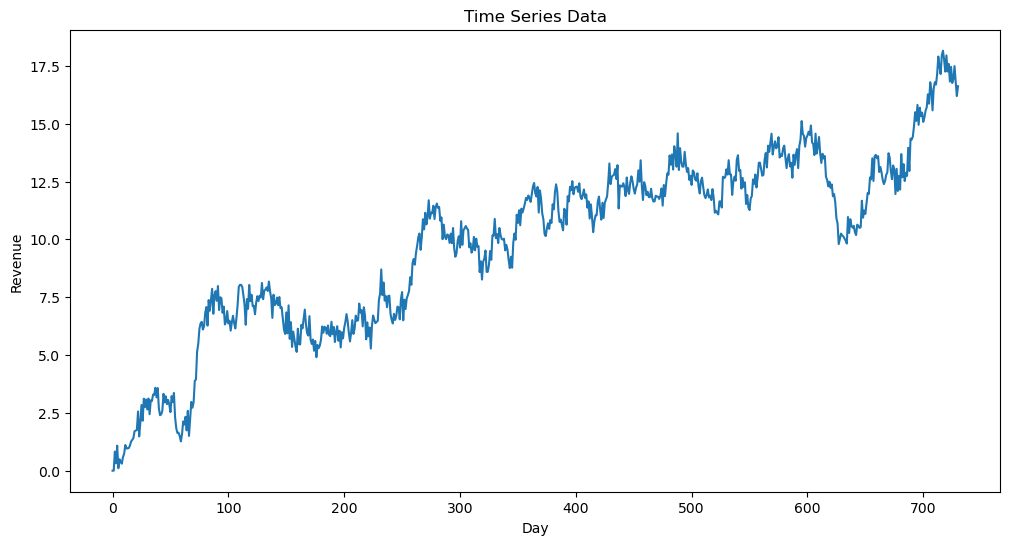

<Figure size 1200x600 with 0 Axes>

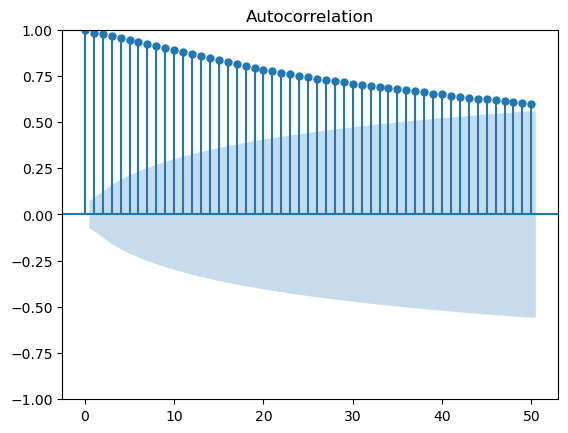

/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

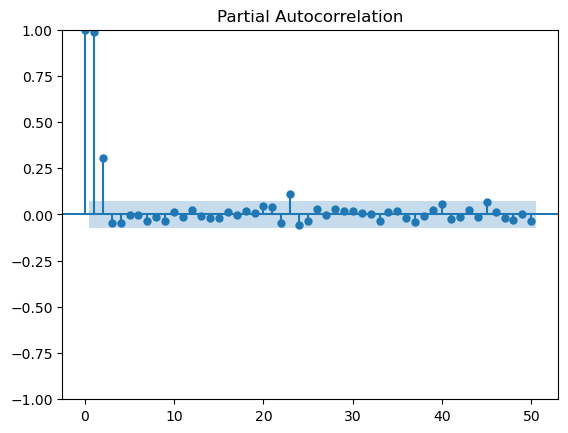

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

# Significance Level for Tests
significance_level = 0.05

# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(churn_time_data['Revenue'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Critical Value ({key}): {value}')
print(f'Significance Level: {significance_level}')
if adf_result[1] < significance_level:
    print("Reject Null Hypothesis: Time series is stationary.")
else:
    print("Fail to Reject Null Hypothesis: Time series is non-stationary.")

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
kpss_result = kpss(churn_time_data['Revenue'])
print('\nKPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
for key, value in kpss_result[3].items():
    print(f'Critical Value ({key}): {value}')
print(f'Significance Level: {significance_level}')
if kpss_result[1] > significance_level:
    print("Fail to Reject Null Hypothesis: Time series is stationary.")
else:
    print("Reject Null Hypothesis: Time series is non-stationary.")

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(churn_time_data['Revenue'])
plt.title('Time Series Data')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_acf(churn_time_data['Revenue'], lags=50)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(churn_time_data['Revenue'], lags=50)
plt.show()


In [5]:
#split the dataset into training and test with the last 30 days for test 

from statsmodels.tsa.arima.model import ARIMA 
print(churn_time_data)

#assign all other data to training dataset 
training_data = churn_time_data.iloc[:-30]

#get the last 30 dats of the dataset for test 
testing_data = churn_time_data.iloc[-30:] 

print(training_data.shape, testing_data.shape)

     Day    Revenue
0      1   0.000000
1      2   0.000793
2      3   0.825542
3      4   0.320332
4      5   1.082554
..   ...        ...
726  727  16.931559
727  728  17.490666
728  729  16.803638
729  730  16.194813
730  731  16.620798

[731 rows x 2 columns]
(701, 2) (30, 2)


/var/folders/z3/gvw2prhn0vn4667sjbjhdj_h0000gn/T/ipykernel_9114/1446946923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Revenue_diff'] = training_data['Revenue'].diff()


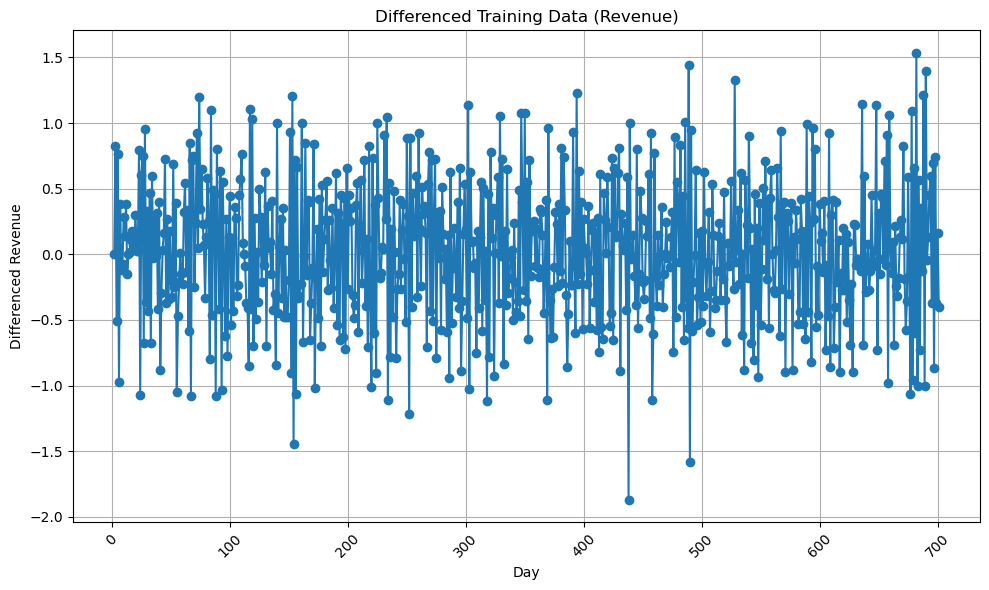

Training data has been differenced to achieve stationarity.


In [6]:
#make the data stationary 

# Make the data stationary
training_data['Revenue_diff'] = training_data['Revenue'].diff()

# Remove the first row containing NaN value
training_data = training_data.dropna()

# Plot the differenced training data to visualize stationarity
plt.figure(figsize=(10, 6))
plt.plot(training_data['Day'], training_data['Revenue_diff'], marker='o', linestyle='-')
plt.title('Differenced Training Data (Revenue)')
plt.xlabel('Day')
plt.ylabel('Differenced Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print a message confirming that the data has been differenced to achieve stationarity
print("Training data has been differenced to achieve stationarity.")

#used dropna because differencing the revenue col to create the revenue diff col results in having a nan value 
#diff substracts the previous value from the current value, and there is no previous value for the first row 
#ensures revenue diff contains no missing values 

In [7]:
# Calculate and print summary statistics
mean_diff = training_data['Revenue_diff'].mean()

print(f"Mean of Differenced Revenue: {mean_diff}")

#mean is very close to zero which is ideal for stationary data 

Mean of Differenced Revenue: 0.02153989985714286


In [8]:
#numerical check that the training dataset is stationary after applying .diff()

# Set significance level
significance_level = 0.05

# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(training_data['Revenue_diff'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Critical Value ({key}): {value}')
print(f'Significance Level: {significance_level}')
if adf_result[1] < significance_level:
    print("Reject Null Hypothesis: Time series is stationary.")
else:
    print("Fail to Reject Null Hypothesis: Time series is non-stationary.")

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
kpss_result = kpss(training_data['Revenue_diff'])
print('\nKPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
for key, value in kpss_result[3].items():
    print(f'Critical Value ({key}): {value}')
print(f'Significance Level: {significance_level}')
if kpss_result[1] > significance_level:
    print("Fail to Reject Null Hypothesis: Time series is stationary.")
else:
    print("Reject Null Hypothesis: Time series is non-stationary.")



ADF Statistic: -44.19124698545646
p-value: 0.0
Critical Value (1%): -3.439739809554328
Critical Value (5%): -2.86568368980381
Critical Value (10%): -2.5689766074363334
Significance Level: 0.05
Reject Null Hypothesis: Time series is stationary.

KPSS Statistic: 0.08426004209524003
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739
Significance Level: 0.05
Fail to Reject Null Hypothesis: Time series is stationary.


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [9]:
#export the cleaned dataset for submission 

training_data.to_csv('/Users/jasminemoniquecooper/Downloads/cleaned_data.csv', index=False)

# Print a message confirming the data has been cleaned and saved
print("Cleaned dataset has been saved to 'cleaned_data.csv'.")

Cleaned dataset has been saved to 'cleaned_data.csv'.


In [10]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


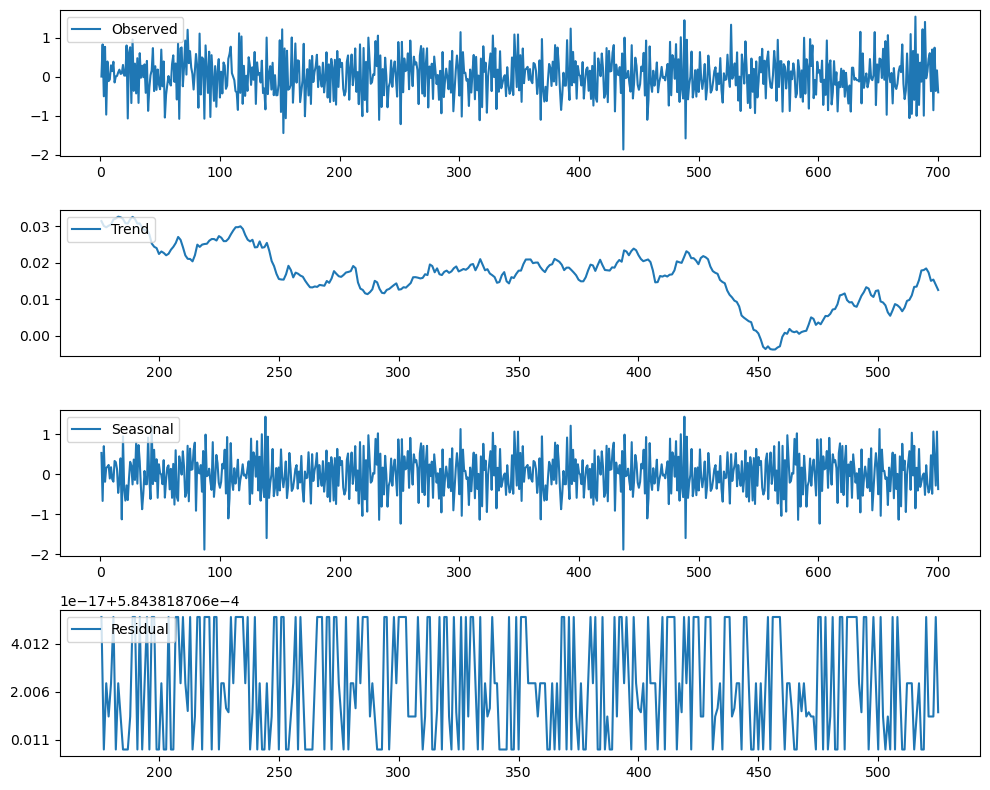

In [11]:
#the presence or lack of a seasonal component
#trends

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the differenced time series data
# Adjust seasonal_period based on the data frequency and observed seasonality
seasonal_period = 350

decomposition = seasonal_decompose(training_data['Revenue_diff'], model='additive', period=seasonal_period)

# Plot decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend.dropna(), label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal.dropna(), label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid.dropna(), label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

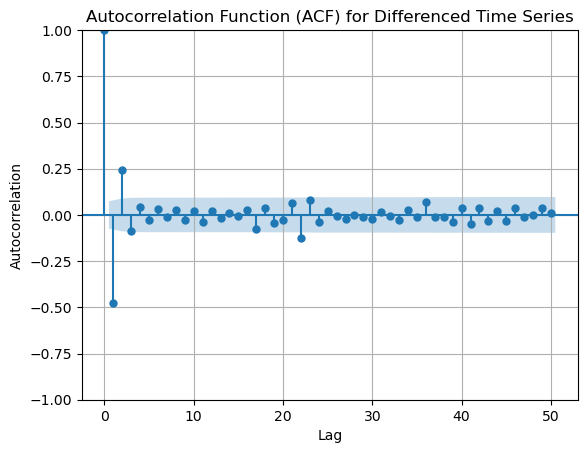

In [12]:
#the acf 

from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for the differenced data
plt.figure(figsize=(12, 6))
plot_acf(training_data['Revenue_diff'], lags=50)
plt.title('Autocorrelation Function (ACF) for Differenced Time Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


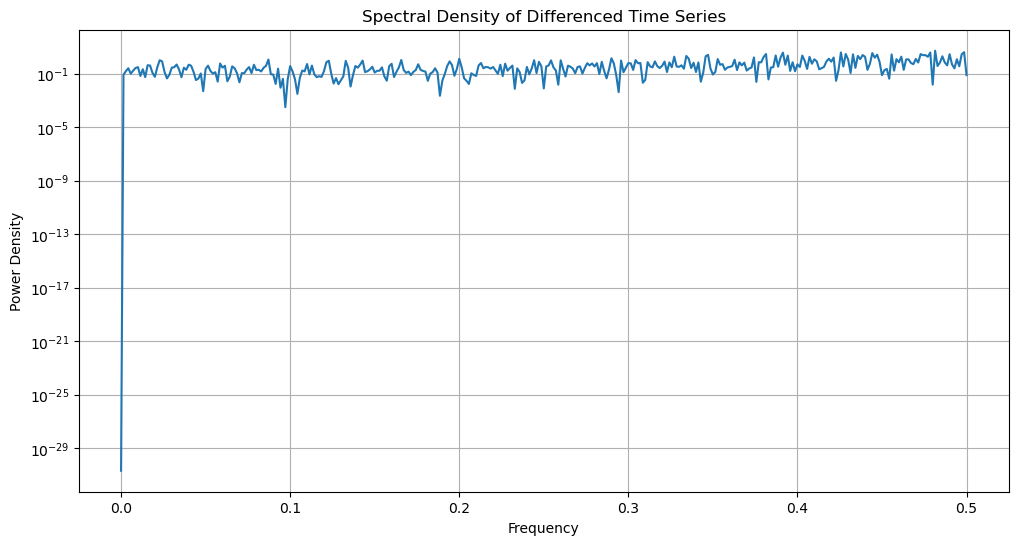

In [13]:
#spectral density 

from scipy.signal import periodogram

# Calculate and plot the spectral density
frequencies, power_density = periodogram(training_data['Revenue_diff'])

plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power_density)
plt.title('Spectral Density of Differenced Time Series')
plt.xlabel('Frequency')
plt.ylabel('Power Density')
plt.grid(True)
plt.show()


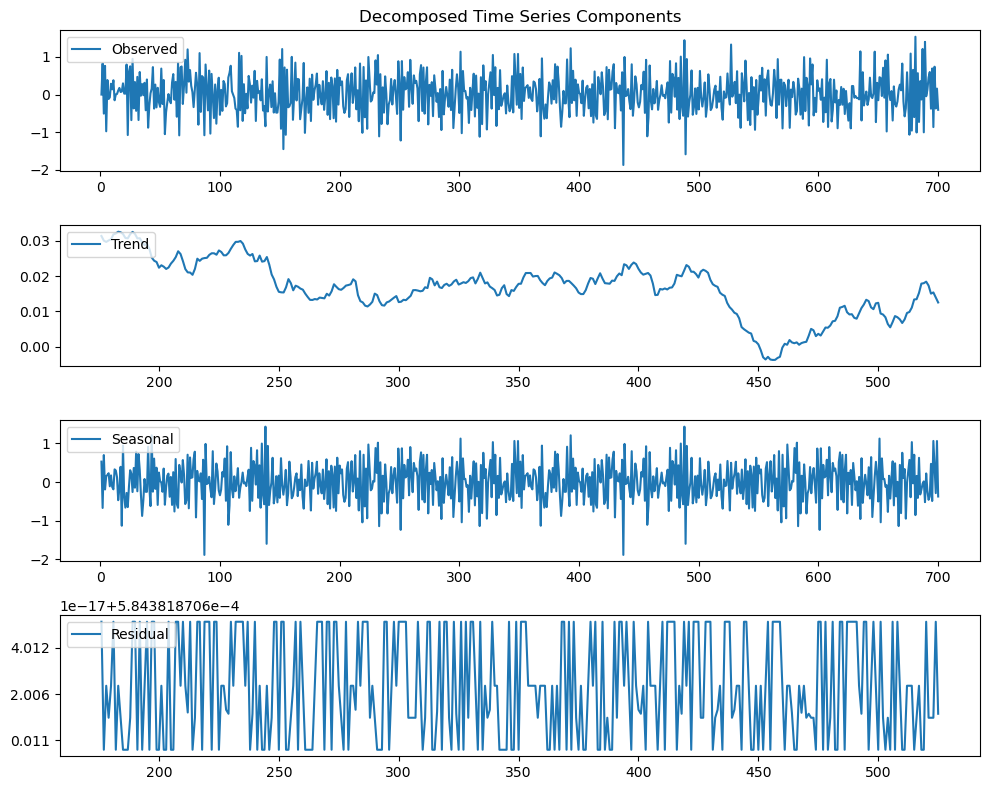

In [14]:

seasonal_period = 350  

# Decompose the differenced time series data
decomposition = seasonal_decompose(training_data['Revenue_diff'], model='additive', period=seasonal_period)

# Plot decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Decomposed Time Series Components')

plt.subplot(412)
plt.plot(decomposition.trend.dropna(), label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal.dropna(), label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid.dropna(), label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


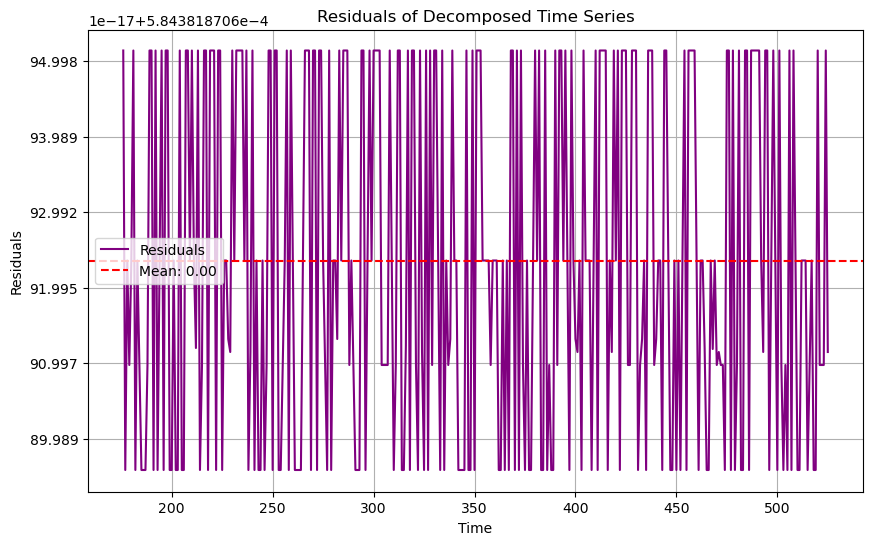

<Figure size 1200x600 with 0 Axes>

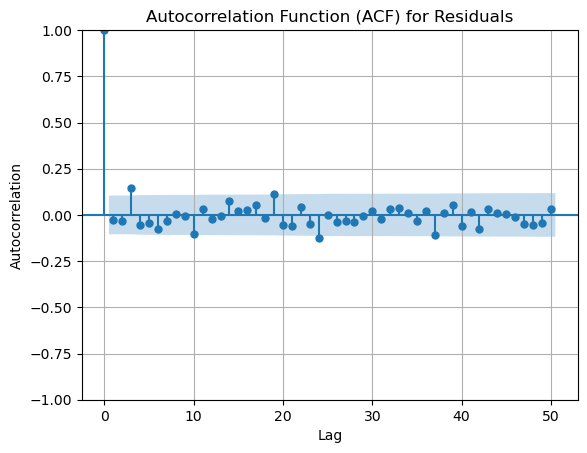

In [15]:
#confirmation of the lack of trends in the residuals of the decomposed series
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(decomposition.resid.dropna(), label='Residuals', color='purple')
plt.title('Residuals of Decomposed Time Series')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

# Print the center of the residuals
residual_center = decomposition.resid.mean()
plt.axhline(y=residual_center, color='r', linestyle='--', label=f'Mean: {residual_center:.2f}')
plt.legend()

plt.show()

# Plot ACF for the residuals
plt.figure(figsize=(12, 6))
plot_acf(decomposition.resid.dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) for Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=939.771, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1111.879, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=935.523, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=974.690, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1111.016, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=937.171, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=937.224, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=938.023, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=936.655, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.289 seconds


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


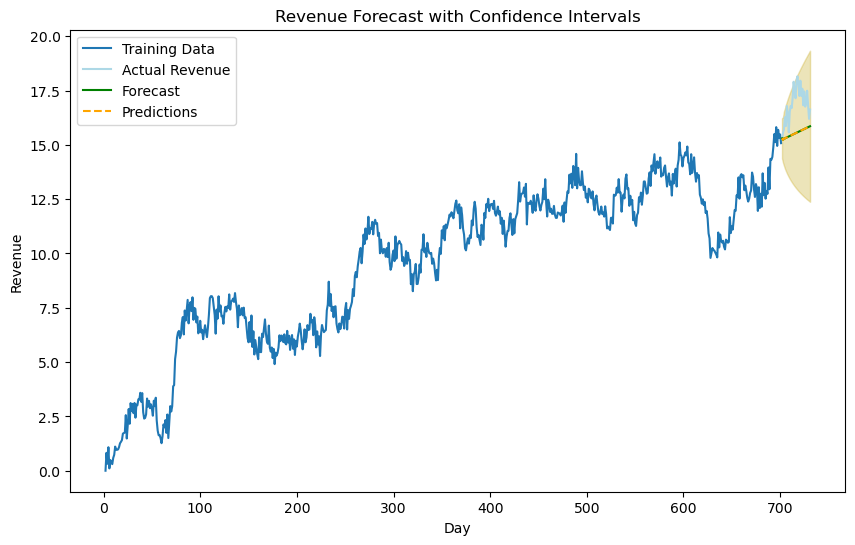

Root Mean Squared Error (RMSE): 1.4934663287591938
AIC: 935.5226788229337
BIC: 949.1716310496352


In [16]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np

# Fit auto ARIMA model
model = auto_arima(training_data['Revenue'], trace=True, stepwise=True)

# Fit the best model to the entire training data
fit_model = model.fit(training_data['Revenue'])

# Forecast the next 30 days
forecast, conf_int = fit_model.predict(n_periods=30, return_conf_int=True)

# Predict against test data
predictions, conf_int_pred = fit_model.predict(n_periods=len(testing_data), return_conf_int=True)

# Plot the combined graph with confidence intervals
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(training_data['Day'], training_data['Revenue'], label='Training Data')

# Plot testing data
plt.plot(testing_data['Day'], testing_data['Revenue'], label='Actual Revenue', color = 'lightblue')

# Plot forecast
plt.plot(testing_data['Day'], forecast, color='green', label='Forecast', linestyle='-')
plt.fill_between(testing_data['Day'], conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.2)

# Plot predictions against testing data
plt.plot(testing_data['Day'], predictions, color='orange', label='Predictions', linestyle='--')
plt.fill_between(testing_data['Day'], conf_int_pred[:, 0], conf_int_pred[:, 1], color='darkorange', alpha=0.2)

plt.title('Revenue Forecast with Confidence Intervals')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Evaluate the model performance
from sklearn.metrics import mean_squared_error

# Calculate RMSE
mse = mean_squared_error(testing_data['Revenue'], predictions)
rmse = np.sqrt(mse)

# Output RMSE, AIC, BIC
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'AIC: {fit_model.aic()}')
print(f'BIC: {fit_model.bic()}')
